<a href="https://colab.research.google.com/github/Andre-jvz/SeriesDeTiempo-Tec/blob/main/Sesion2_JAVZ_a01732626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## André Villagrán Zamora A01732626
### Sesión 2 - 15 feb 2023

Crea una lista que contenga los integrantes de tu famila

In [12]:
mifamilia = ['Sara', 'Rosalba', 'Julián',]

In [10]:
mifamilia
['Sara', 'Rosalba', 'Julián']

['Sara', 'Rosalba', 'Julián']

Vamos a elegir el integrante 1, *Nota: python comienza a contar desde cero*

In [16]:
mifamilia [0]


'Sara'

creamos una lista que contenga números

In [33]:
numeros =[12, 6, 7, 15, 2]

In [34]:
numeros

[12, 6, 7, 15, 2]

importamos un par de librerias/módulos. Que nos ayudaran a manejar números

In [35]:
import numpy as np
import pandas as pd

Calcularemos la media de estos números y los ordenaremos

In [36]:
# primero convertimos estos numeros en arreglo
numeros = np.array(numeros)


In [37]:
type(numeros)

numpy.ndarray

In [38]:
#calculamos la media y redondeamos a un decimal
numeros.mean().round(1)

8.4

In [39]:
#ordenamos los números con .sort()


In [41]:
numeros.sort

<function ndarray.sort>

In [42]:
#mostramos los números


Pandas utiliza una estructura de datos llamada **DataFrames**, que no son otra cosa que datos organizados en filas y columnas

In [26]:
##creamos un diccionario 
dic_grupo = {'nombre':['Juan','Ale', 'Jime', 'David'], 
             'Edad':[23,14,28,18],
             'calificación':[90,70,45,85]}

In [27]:
##vemos su contenido
dic_grupo

{'nombre': ['Juan', 'Ale', 'Jime', 'David'],
 'Edad': [23, 14, 28, 18],
 'calificación': [90, 70, 45, 85]}

In [46]:
## ahora lo convertimos en DataFrame con pandas
grupox= pd.DataFrame(dic_grupo)

In [52]:
# ahora vemos el dataframe
pd.DataFrame(dic_grupo)

,nombre,Edad,calificación
0,Juan,23,90
1,Ale,14,70
2,Jime,28,45
3,David,18,85


In [57]:
# El nombre de las columnas se llama columns
grupox.columns

Index(['nombre', 'Edad', 'calificación'], dtype='object')

In [58]:
# el nombre de las filas se llama Index
grupox.index

RangeIndex(start=0, stop=4, step=1)

In [59]:
# vemos su estructura con shape
grupox.shape

(4, 3)

In [60]:
# seleccionamos la columna nombre
grupox["nombre"]

0     Juan
1      Ale
2     Jime
3    David
Name: nombre, dtype: object

In [62]:
# seleccionamos la columna Edad
grupox[[ "nombre", "Edad" ]]

,nombre,Edad
0,Juan,23
1,Ale,14
2,Jime,28
3,David,18


In [ ]:
# seleccionamos la columna edad y la columna nombre


## Repaso de inferencia

Vamos a instalar yahoo finance para descargar precio de las acciones  

In [ ]:
pip install yfinance

ya instalada la libreria, podemos decirle a python que la use

In [64]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

ahora importamos los datos de las acciones de walmart de México

In [65]:
walmex = yf.download('WALMEX.MX', 
                       start='2017-01-01', 
                       end='2017-12-31',
                       progress=False)

damos una mirada rápida a lo que contiene este dataframe con .head()

In [68]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,37.099998,37.500000,37.049999,37.049999,32.116268,842718
2017-01-03,37.540001,37.840000,37.450001,37.680000,32.662376,10727225
2017-01-04,37.820000,37.849998,37.500000,37.750000,32.723061,20056831
2017-01-05,37.750000,37.849998,36.950001,37.410000,32.428341,34325666
2017-01-06,37.520000,37.750000,36.439999,36.529999,31.665524,51254600


Grafiquemos el precio de las acciones de walmex

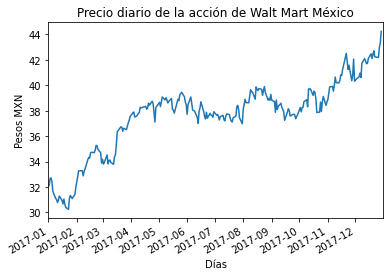

In [76]:
walmex["Adj Close"].plot()
plt.title("Precio diario de la acción de Walt Mart México")
plt.ylabel("Pesos MXN")
plt.xlabel("Días")
plt.xlim("2017-01-01", "2017-12-31")
plt.show()

Vamos a renombrar Adj Close

In [78]:
walmex= walmex.rename(columns={"Adj Close":"adj_close"})

Vamos a calcular los return (rendimiento) de las acciones de walmart, usando .pct_change() de pandas

In [79]:
walmex["return"] = walmex["adj_close"].pct_change()

In [80]:
walmex.head()

,Open,High,Low,Close,adj_close,Volume,return
Date,,,,,,,
2017-01-02,37.099998,37.500000,37.049999,37.049999,32.116268,842718,NaN
2017-01-03,37.540001,37.840000,37.450001,37.680000,32.662376,10727225,0.017004
2017-01-04,37.820000,37.849998,37.500000,37.750000,32.723061,20056831,0.001858
2017-01-05,37.750000,37.849998,36.950001,37.410000,32.428341,34325666,-0.009006
2017-01-06,37.520000,37.750000,36.439999,36.529999,31.665524,51254600,-0.023523


Vamos a ver su histograma

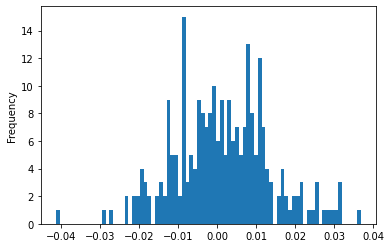

In [82]:
walmex["return"].plot.hist(bins=80);

In [83]:
# precio promedio 2017
walmex["adj_close"].mean().round(3)

37.599

In [84]:
#mean return
walmex["return"].mean().round(6)

0.001359

Supongamos que ahora, alguien nos pregunta qué cuál es el rendimiento promedio de las acciones de walt-mart México.

Note que nosotros tenemos una muestra, los datos del año 2017.

La población total, o los datos completos serían los datos de todos los años que existirá walmart de México, los años pasados y futuros.

Nos gustaria construir un intervalo de confianza del 95% para el precio de las acciones de walmart

Recuerde que si el intervalo de confianza al 95% de confianza es

IC(95%) = media +- 1.96 SE 



In [93]:
media = walmex["return"].mean()
desv_est = walmex["return"].std(ddof=1) #desv est de una muestra


In [94]:
limite_superior = media + (1.96* desv_est)
limite_inferior = media - (1.96* desv_est)

Ahora nos gustaria probar la hipótesis de que el rendimiento de las acciones de walmart es 0.0006 

$H_0: \mu=0.0006$

$H_a: \mu \neq 0.0006$


p-value es el nivel de signifancia exacto de la prueba de hipótesis 

In [ ]:
from scipy.stats import norm

In [ ]:
prob_ztest = norm.cdf(z_test).round(2)
## como es una prueba de 2 colas el p-value es 2 veces
## prob_ztest
p_value = 2 * prob_ztest

Regla de decisión: si el **p-valor**$ < \alpha $ entonces rechazar $H_0$.